# K Nearest Neighbors (KNN) Prediction Model For Anonymized Data Set
I will be using the K Nearest Neighbors (KNN) algorithm to predict the target variable for anonymized data set. This project simulates a data science interview question where you are given an anonymized data set and you are then tasked to create a machine learning model based on that.

I am completing this project as part of the Python for Data Science and Machine Learning Bootcamp on Udemy.

# Importing Libraries and the Data Set
First, I'll start by importing the libraries I will use and the dataset we have been given.

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [128]:
df = pd.read_csv('KNN_Project_Data')

In [129]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


We see that our columns for this data frame are anonymized and it looks like the data ranges from 0 past 2500. We have a target class that we'll be using to test our model on.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [131]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# Exploratory Data Analysis
Although there's probably not a lot that we can say without knowing the column names, we can at least see, in general, what the data looks like. 

In [132]:
#I'll start with running an Empirical Cumulative Distirbution Function (ECDF)
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements.'''
    #Number of data points: n
    n = len(data)
    
    #x-data for the ECDF: x
    x = np.sort(data)
    
    #y-data for the ECDF: y
    y = np.arange(1,n+1)/n
    
    return x,y

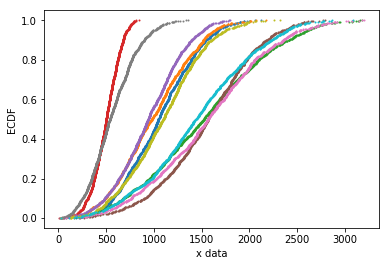

In [133]:
#Plotting the ecdf for each variable
#Because the columns aren't recognizable, I'm not looking to be able to differentiate between variables
#Instead, I just want to have a rough understanding of where each columns stands in relation to each other
for column in df.columns[:-1]:
    x, y = ecdf(df[column])
    _ = plt.plot(x,y, marker = '.',linestyle = 'none',markersize=2)
_ = plt.xlabel('x data')
_ = plt.ylabel('ECDF')
plt.show()

It looks like there are certain groups of variables that are similar. It specifically looks like there are 4 particular distributions in this data set. 

Again, there's not a lot that we can get from this without knowing the column information, but we can at least understand what the general relationships look like as well. To do this, I'll use a pairplot to show the relationships and hue it for our target variable.

C:\Users\Brandon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Brandon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


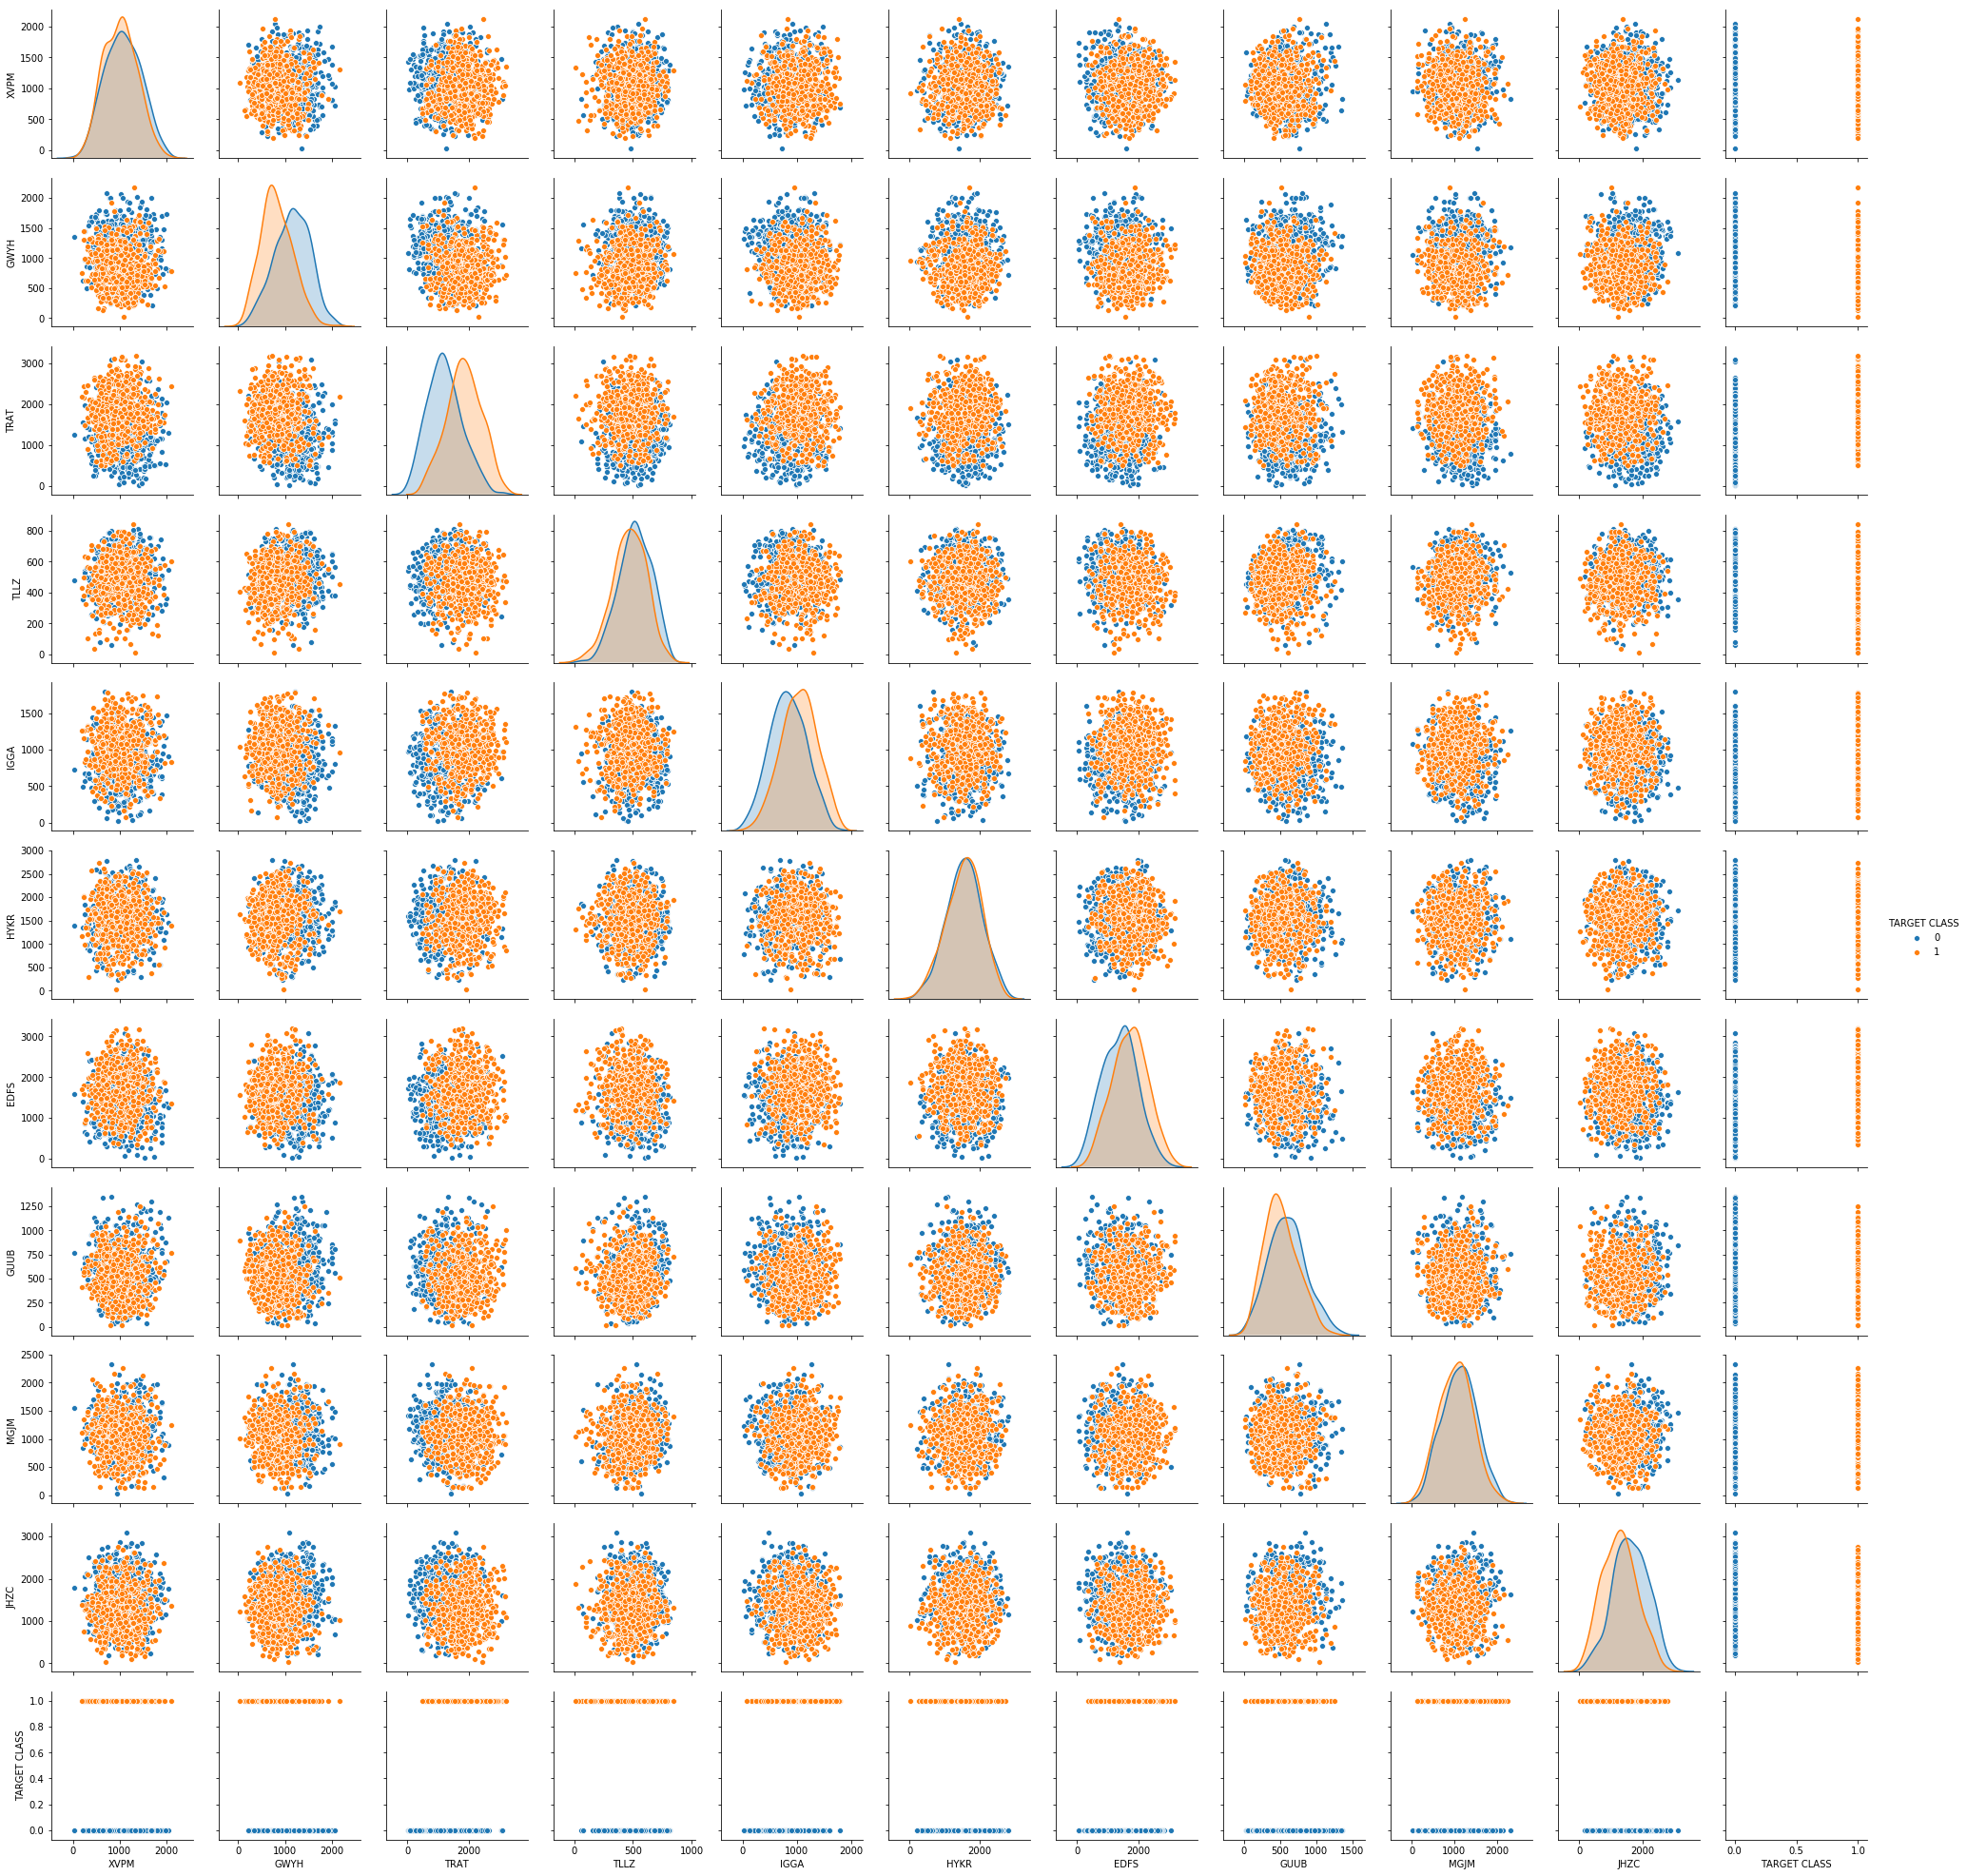

In [134]:
sns.pairplot(df, hue='TARGET CLASS')

It looks like our target class is on the outer edges of our data in most of these plots. it doesn't seem like it's in the middle as much, but it's hard to tell here. 

# Preprocessing
In order to do a K Nearest Neighbors model, I'm going to standardize the variables because this model is very sensitive to the range of the variable being examined. If I didn't standardize them, then a larger ranged variable would be weighted heavier because it simply has a larger value and not because of its use as an indicator for the data. 

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
#Create an instance of the scaler
scaler = StandardScaler()

In [137]:
#Fit the scaler to all feature columns for our target variable
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
#The transform method performs a standardization on the data
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_pp = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_pp.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Our data looks good and ready to be put into a model!

# Training and Testing our Model
I'll use cross validation to test and train the model by seperating the data into training and testing data for our KNN model.

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = df_pp
y = df['TARGET CLASS']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

I will start with a K value of 1 and then use the "elbow method" to choose a k-value, meaning I'll run a 'for' loop and will create a graph to see which K value performs best.


In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [144]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [145]:
pred1 = knn1.predict(X_test)

# Evaluating and Optimizing the Model
Because I'm going to optimize it for the k value, I'll use the classification report in sklearn to make quick, simple evaluations of our model.

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
confmat =confusion_matrix(y_test,pred1)
print(confmat)
print(classification_report(y_test,pred1))
print('Overall accuracy:',1-(confmat[0,1]+confmat[1,0])/(confmat[0,0]+confmat[1,1]),'%')

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

Overall accuracy: 0.6111111111111112 %


Our initial model has an overall average of about 61% so we'll be looking to do better than this as we look through our k values.

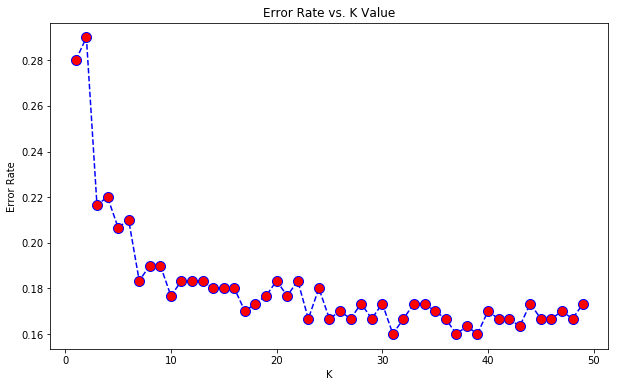

In [148]:
#Elbow method
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
#Plot these error values
_ = plt.figure(figsize=(10,6))
_ = plt.plot(range(1,50),error_rate, color = 'blue', linestyle = 'dashed',marker = 'o',markerfacecolor='red',markersize=10)
_ = plt.title('Error Rate vs. K Value')
_ = plt.xlabel('K')
_ = plt.ylabel('Error Rate')
plt.show()

It looks like 31 is a good K value to pick, as it starts to go back up and be more choppy afterwords.

In [149]:
knn31 = KNeighborsClassifier(n_neighbors=31)
knn31.fit(X_train,y_train)
pred31 = knn31.predict(X_test)
confmat =confusion_matrix(y_test,pred31)
print(confmat)
print(classification_report(y_test,pred31))
print('Overall accuracy:',1-(confmat[0,1]+confmat[1,0])/(confmat[0,0]+confmat[1,1]),'%')

[[123  29]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Overall accuracy: 0.8095238095238095 %


Our model is significantly better than the original one with k=1. 

To get a better picture of what these scores look like, I'm going to make a Precision-recall curve, ROC curve, and a CAP curve.

In [150]:
#I want to create the ROC curve and the Precision-recall curve
def ROCAUC(xtest,ytest,modelname):
    """Draws the ROC curve and calculates AUC"""
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    auc = roc_auc_score(ytest, probs)
    print('AUC: %.3f' %auc)
    #roc curve
    fpr,tpr,thresholds = roc_curve(ytest, probs)
    #plot the no skill 50/50 guess
    _ = plt.plot([0,1],[0,1],linestyle='--')
    #plot the roc curver for the model
    _ = plt.plot(fpr,tpr,marker = '.')
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    plt.show()

def Prerec(xtest,ytest,modelname, predictions):
    """Draws the Precision-recall curve and prints f1,auc, and ap"""
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    probs=probs[:,1] 
    precision, recall, threshlds = precision_recall_curve(ytest, probs)
    f1 = f1_score(ytest,predictions)
    auc = auc(recall, precision)
    #ap stands for average precision score
    ap = average_precision_score(ytest, probs)
    print('f1=%.3f auc = %.3f ap = %.3f' % (f1,auc,ap))
    AR= 2*auc-1
    print(AR)
    _ = plt.plot([0,1],[0.5,0.5],linestyle = '--')
    _ = plt.plot(recall, precision, marker ='.')
    _ = plt.xlabel('Recall')
    _ = plt.ylabel('Precision')
    plt.show()

f1=0.843 auc = 0.886 ap = 0.879
0.7712735389291581


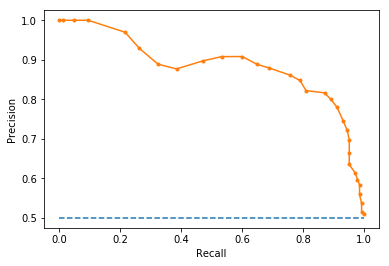

In [151]:
Prerec(X_test,y_test,knn31,pred31)

AUC: 0.897


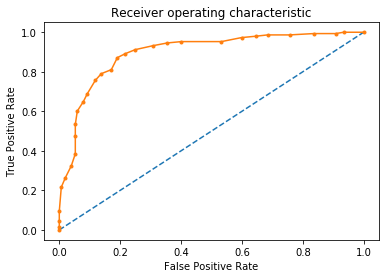

In [152]:
ROCAUC(X_test, y_test, knn31)

In [157]:
#CAP curve
def CAP(xtest, ytest, modelname):
    """ Calculates the Cumulitive Accuracy Profile (CAP) curve"""
    from sklearn.metrics import auc
    
    total = len(ytest)
    class_1_count = np.sum(ytest)
    class_0_count = total - class_1_count
    plt.figure(figsize = (9,4))
    
    #First plot a random model
    _ = plt.plot([0,total],[0,class_1_count],c='r',linestyle='--',label='Random Model')
    #Plot Perfect model
    _ = plt.plot([0,class_1_count,total],[0,class_1_count,class_1_count],c='grey',linewidth=2,label='Perfect Model')
    #Now to add our model
    probs = modelname.predict_proba(xtest)
    #want only the probabilities for the positive outcome only
    
    probs=probs[:,1] 
    model_y = [y for _, y in sorted(zip(probs, ytest), reverse = True)]
    y_values = np.append([0], np.cumsum(model_y))
    x_values = np.arange(0, total + 1)
    _ = plt.plot(x_values,y_values,c='b',label='Predictive Model',linewidth=4)
    
    #50% mark line 
    index = int((50*total / 100))
    ## 50% Verticcal line from x-axis
    _ = plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')
    
    ## Horizontal line to y-axis from prediction model
    _ = plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')
    
    class_1_observed = y_values[index] * 100 / max(y_values)
    print("Percentage of Total Positive Outcomes at 50%: {}%".format(class_1_observed))
    
    #auc
    # Area under Random Model
    a = auc([0, total], [0, class_1_count])
    
    # Area between Perfect and Random Model
    aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
    
    # Area between Trained and Random Model
    aR = auc(x_values, y_values) - a

    print("Accuracy Ratio: {}%".format(aR / aP*100))
    
    _ = plt.xlabel('Entries')
    _ = plt.ylabel('Target Variable')
    _ = plt.title('Cumulative Accuracy Profile')   
    _ = plt.legend()
    
    plt.show()

Percentage of Total Positive Outcomes at 50%: 83.78378378378379%
Accuracy Ratio: 80.98328591749645%


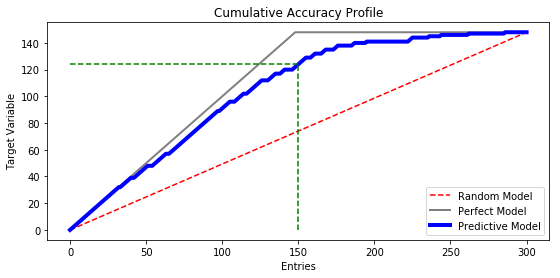

In [158]:
CAP(X_test,y_test,knn31)

As these all measure models slightly differently (as they are measure slightly different things when they measure accuracy), I tend to prefer a range of understanding for our model. The CAP curve shows that we were able to predict almost 84% of the positive outcomes in the data set at the 50% mark, meaning, if we sorted our data by probability to be a 1, then we could predict 84% of the total outcome number with the first 50% of our data set based on these probabilities. A score between 80 and 90% is considered a very good model and would have many applications depending on the context.

# Conclusion
I used the anonymized data to create a K Nearest Neighbors model for classifying the dataset. After evaluating and optimizing, I created a model that had just under 81% accuracy against the training data. 